<a href="https://colab.research.google.com/github/PanLuochuan/Visual-Analysis-of-Obesity-and-Correlated-Variables/blob/main/Pan_luochuan's_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visual Analysis of Obesity and Correlated Variables**

###**Background:**
The dataset collected data on the eating habits and physical conditions of people aged 14-61 in three countries - Mexico, Peru and Colombia - through an online platform where each question was answered by an anonymous user and the information was then processed and aggregated. By analyzing the relationship between obesity and various variables, such as physical indicators, lifestyle, health status, etc., potential correlations can be found, such as whether eating habits are related to obesity, the changing trend of obesity rates in different age groups, and the degree of association between obesity and health status. These data can be used to explore the degree of influence of different factors on obesity, so as to understand the obesity problem more comprehensively, and thus provide guidance for the prevention and management of obesity.

###**Purpose:**
The main purpose of this analysis is to find the variables that are strongly correlated with obesity and analyze the relationship between these variables and obesity through visualization .

###**Attribute Information**
###The attributes related with eating habits are:
* FAVC: Frequent consumption of high caloric food,
*FCVC: Frequency of consumption of vegetables,
*NCP: Number of main meals,
*CAEC: Consumption of food between meals,
*CH20: Consumption of water daily,
*CALC: Consumption of alcohol.
###The attributes related with the physical condition are:
*SCC: Calories consumption monitoring,
*FAF: Physical activity frequency,
*TUE: Time using technology devices,
*MTRANS: Transportation used.
###variables obtained :
*Gender,
*Age,
*Height,
*Weight.
###NObesity values （BMI） are:
*Underweight: Less than 18.5,
*Normal: 18.5 to 24.9,
*Overweight: 25.0 to 29.9,
*Obesity I: 30.0 to 34.9,
*Obesity II: 35.0 to 39.9,
*Obesity III: Higher than 40.

#**Read Data**

In [ ]:
# Import the library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Doenload ObesityDataSet.csv in the zip package.
# Upload ObesityDataSet.csv to Google Drive
from google.colab import files
files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


{'ObesityDataSet.csv': b'Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad\r\nFemale,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight\r\nFemale,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight\r\nMale,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight\r\nMale,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I\r\nMale,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II\r\nMale,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight\r\nFemale,23,1.5,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight\r\nMale,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight\r\nMale,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Wei

In [ ]:
# Check where is the ObesityDataSet.csv file being uploaded
!pwd

/content


In [ ]:
#read this file
obesity = pd.read_csv('/content/ObesityDataSet.csv')
print(obesity.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

## **Data Cleaning**

In [ ]:
#Check for missing data : It is found that there are no missing values in the data.
obesity.isnull().sum()

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad    0
dtype: int64

#**Observe the distribution of the sample and observe the outliners**
From the output data , it can be clearly observed that the skewness of age is very skewed , the kurtosis of data is too peaked.

According to the distribution of age and height below . We can see that the most "Age" variable are between 19 to 25 . The problem with age distribution may be due to sampling methods . And the "Height"variable is distributed normally .

"Age" as one of the observations , we need to observe the degree of association between different age groups and obesity, provided that it does not affect the distribution of other observations , the presence of outliers does not need to be removed .

Then ,observed "sex" distribution . As you can see from the graph below, the distribution is uniform .

And next we look at "NObeyesdad" distribution , the seven categories of obesity were equally distributed .

In general , the distribution of the whole sample is relatively uniform .

In [ ]:
#Basic summary statistics for columns containing numeric data type
#Check whether the sample distribution is as expected
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


###Ranges

*   Age: From 14 to 61 years,
*   Height: From 1.45 to 1.98,
*   Weight: From 39 to 173,
*FCVC: From 1 to 3.00,
*    NCP: From 1 to 4.00,
*   CH2O: From 1 to 3.00,
*   FAF: From 0.00 to 3.00,
*   TUE: From 0.00 to 2.00.


In [ ]:
#check the Skewness and the Kurtosis of the numerical data
col=obesity[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]
skewness=col.skew()
kurtosis=col.kurtosis()
data={"Skewness":skewness,"Kurtosis":kurtosis}
df=pd.DataFrame(data)
print(df)

        Skewness  Kurtosis
Age     1.529100  2.826389
Height -0.012855 -0.562949
Weight  0.255410 -0.699898
FCVC   -0.432906 -0.637546
NCP    -1.107097  0.385527
CH2O   -0.104912 -0.879395
FAF     0.498490 -0.620588
TUE     0.618502 -0.548660


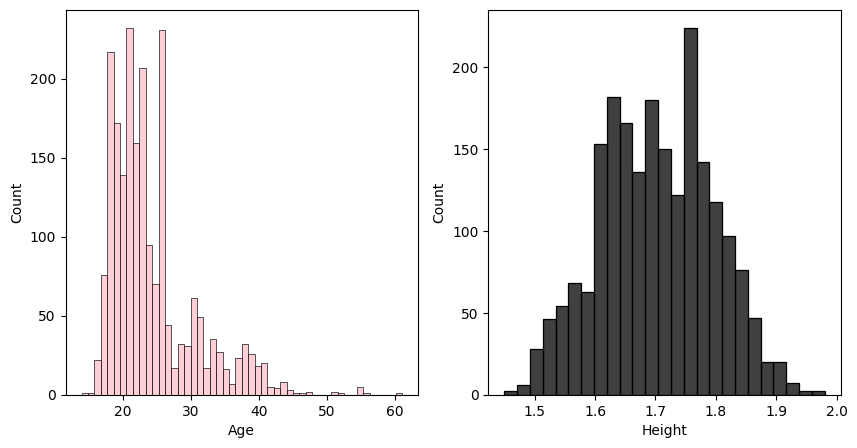

In [ ]:
#The distribution of age and height was observed according to the histogram.
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes1=sns.histplot(x="Age",ked=True,alpha=0.2,data=obesity,color="pink",ax=axes[0])
axes2=sns.histplot(data=obesity,x="Height",ked=True,alpha=0.2color="navy",ax=axes[1],alpha=0.8);
axes1.set_title("Age's Distribution")
axes1.set_title("Height's Distribution")
plt.show()

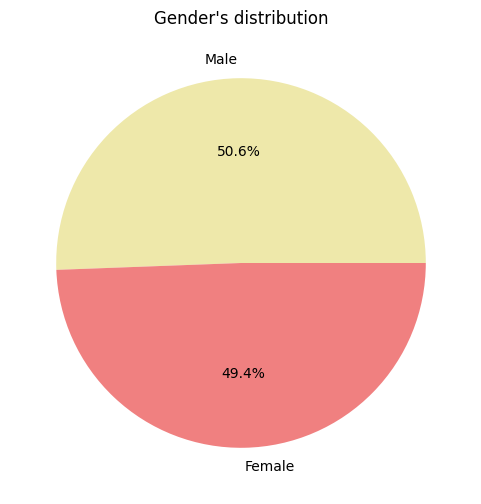

In [ ]:
#Observed sex distribution
#As you can see from the graph below, the distribution is uniform
plt.figure(figsize=(6,6))
gender_counts = obesity['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',colors=['#EEE8AA','#F08080'])
plt.title("Gender's distribution")
plt.show()

<Axes: title={'center': 'Nobeyesdad types'}>

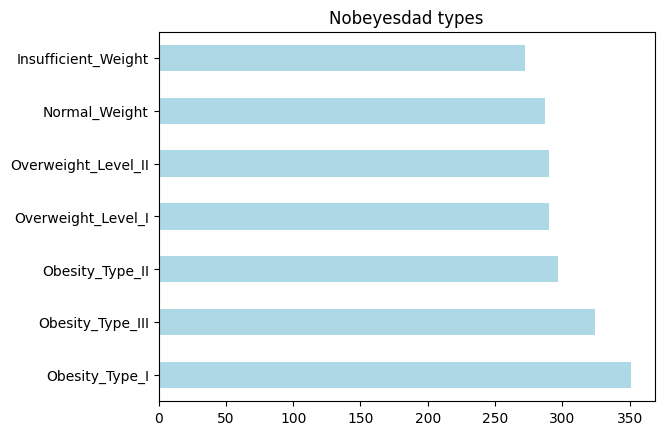

In [ ]:
#The seven categories of obesity were equally distributed
obesity["NObeyesdad"].value_counts().plot.barh(color='#ADD8E6', title='Nobeyesdad types')

#**Observe the correlation between each variable and obesity, and find the variable most associated with obesity .**
Before looking at the correlation between each variable and obesity, we first converted the continuous data into numerical data to facilitate subsequent observation .

Mapping heat map , then observe the correlation between the each variables and obesity . Acoording to the observations , the variables most associated with "family_history_with_overweight" and "Height" .

In [ ]:
#Convert continuous data to numerical data
le = LabelEncoder()
obesity_change=obesity.copy()
for column in obesity.select_dtypes(include=['object']).columns:
    obesity_change[column] = le.fit_transform(obesity_change[column])
obesity_change.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

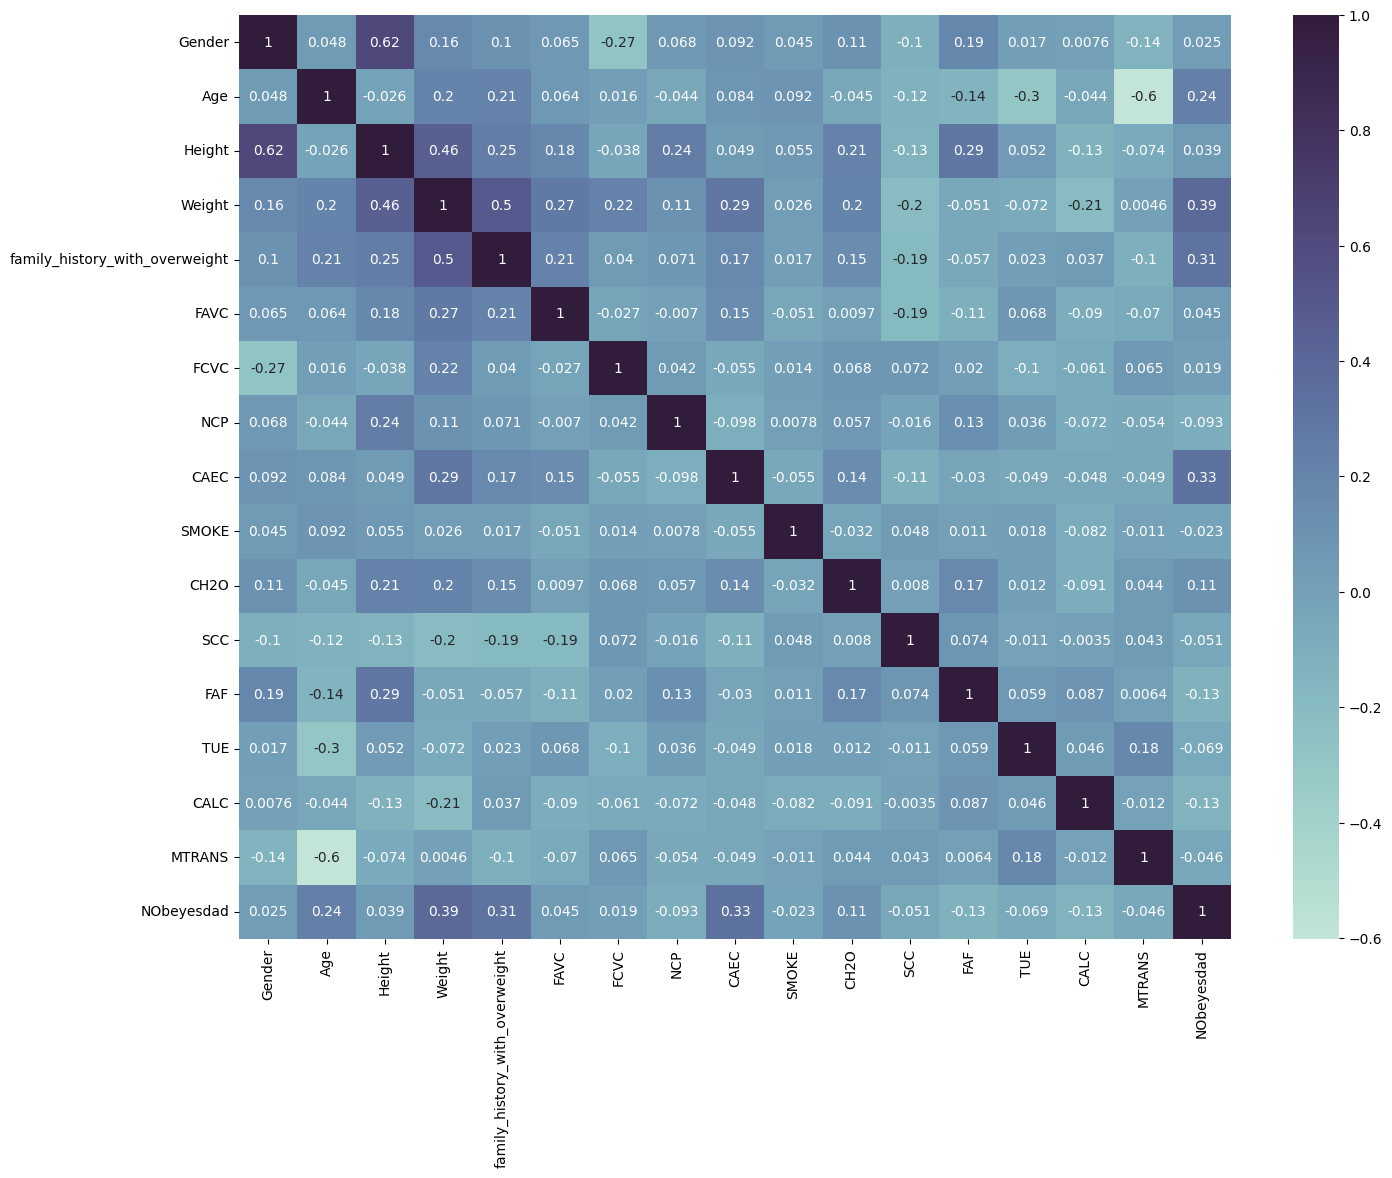

In [ ]:
#Mapping heat map,then observe the correlation between the variables and obesity
#By comparsion , the variables most associated with obesity were a family history of overweight and height
def plot_corr(obesity_change, annot=True):
    _, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(obesity_change.corr(),annot=annot,
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),ax=ax)
plot_corr(obesity_change)




*   Gender and Weight : There is a slight positive correlation, which may be due to differences between male and female births .
*  Age and Weight : There is a slight positive association, possibly because weight increases with age .
*Height and Weight : There is a clear positive correlation, probably because taller people also gain weight .
*family_history_with_overweight and weight : There is a clear positive correlation, possibly people with a family history of obesity are more likely to be obese .
*FAVC and Weight : There is a correlation, which may be due to high calorie foods that lead to obesity .
*FCVC and Weight : There is a slight correlation, not as high as FAVC .
*NCP and Weight : Compared to other variables, there is not much correlation .
*CAEC and Weight : There is a slight correlation, perhaps eating too much food between meals affects weight .
*SMOKE and Weight : Almost no correlation .
*CH20 and Weight : There is a slight correlation, probably related to metabolism .
*SCC and Weight : There is a slight negative correlation .
*FAF and Weight : Almost no correlation .
*TUE and Weight : Almost no correlation .
*CALC and Weight : There is a slight negative correlation .
*MTRANS and Weight : Almost no correlation .

#**Choose "family history with obesity" , "Height" and "Gender" that are most associated with weight . Perform the following analysis .**

In [ ]:
#Create a new column---"isfamilyhistory"
#The number of people with a family history of obesity is set to 1 .
#The number of people without a family history of obesity is set to 0 .
obesity['isfamilyhistory']=(obesity['family_history_with_overweight']=='yes').astype(int)
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,isfamilyhistory
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


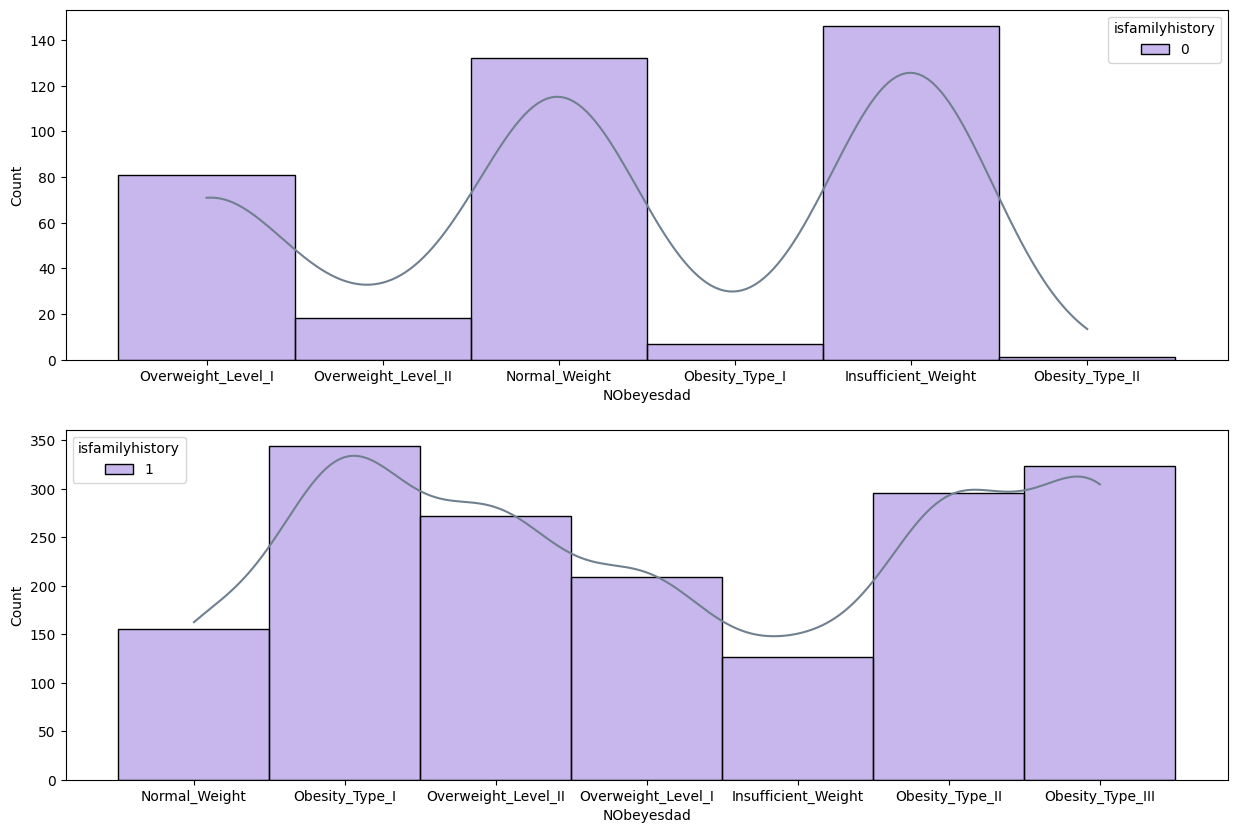

In [ ]:
#Picture 1
#Two histograms were created to compare the distribution of "NObeyesdad" between groups with and without a family history of obesity .
fig,axes=plt.subplots(2,1,figsize=(15,10))
nofamilyhistory=obesity[obesity['isfamilyhistory']==0]
yesfamilyhistory=obesity[obesity['isfamilyhistory']==1]
plot1=sns.histplot(x="NObeyesdad", hue="isfamilyhistory", data=nofamilyhistory, kde=True,ax=axes[0], palette={"#9370DB", "gray"})
plot2=sns.histplot(x="NObeyesdad", data=yesfamilyhistory, hue="isfamilyhistory",kde=True,ax=axes[1], palette={"#9370DB", "gray"} )
for line in plot1.lines:
    line.set_color("#708090")
for line in plot2.lines:
    line.set_color("#708090")


<Axes: xlabel='NObeyesdad', ylabel='Height'>

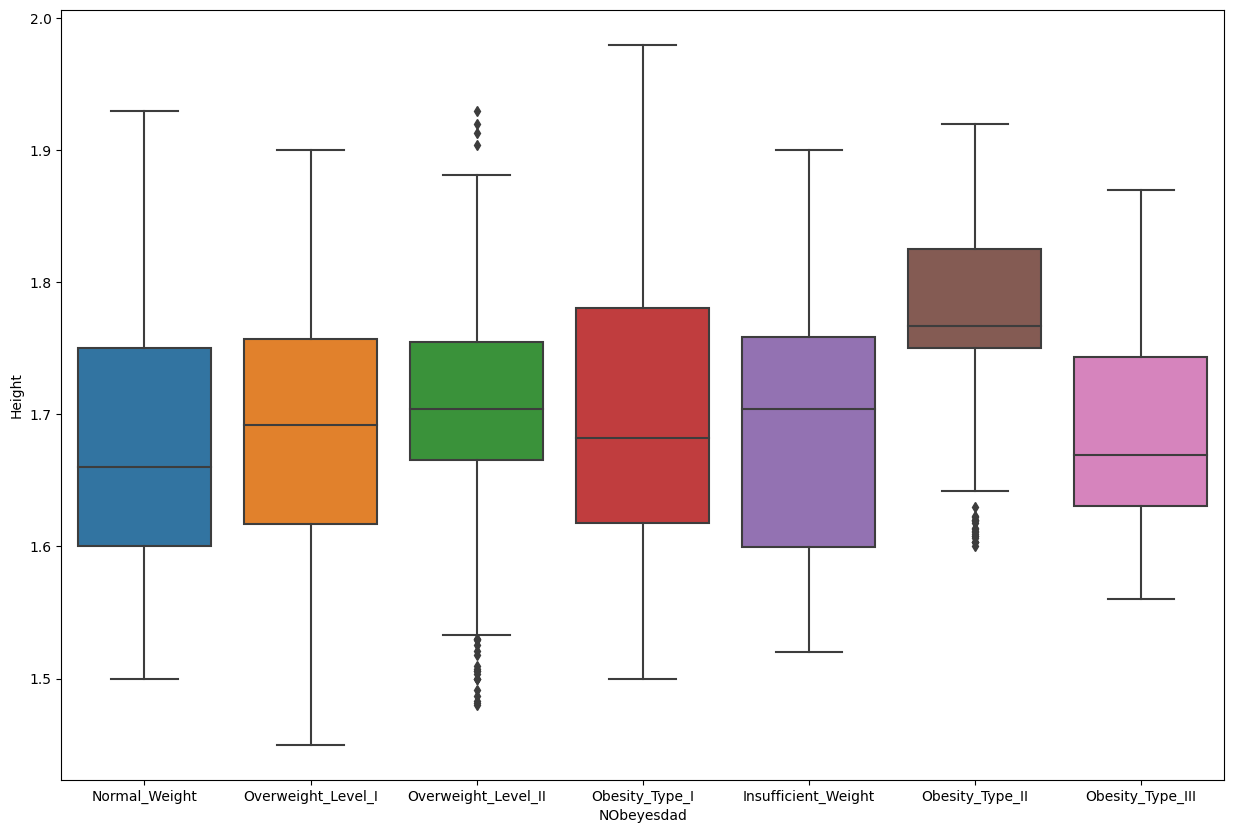

In [ ]:
#Picture 2
#Draw a "Height" boxplot .
plt.figure(figsize=(15,10))
sns.boxplot(x="NObeyesdad",y="Height",data=obesity)

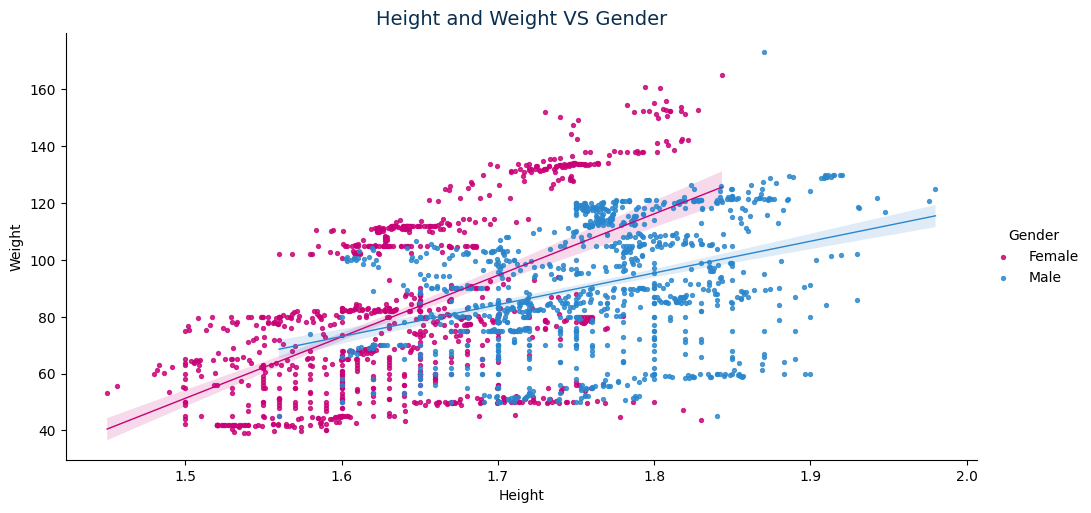

In [ ]:
#Picture 3
#Draw a scatter plot to look at the relationship between height and weight and the differences between genders .
#As height increases, so does weight. The trend held true for both male and female .
sns.lmplot(data=obesity,y="Weight",x="Height",height=5,aspect=2,
    hue="Gender",palette={"Female": "#c90076", "Male": "#2986cc"},
    scatter_kws={"s": 8},line_kws={"linewidth": 1},)
plt.title("Height and Weight VS Gender", fontsize=14)
plt.show()

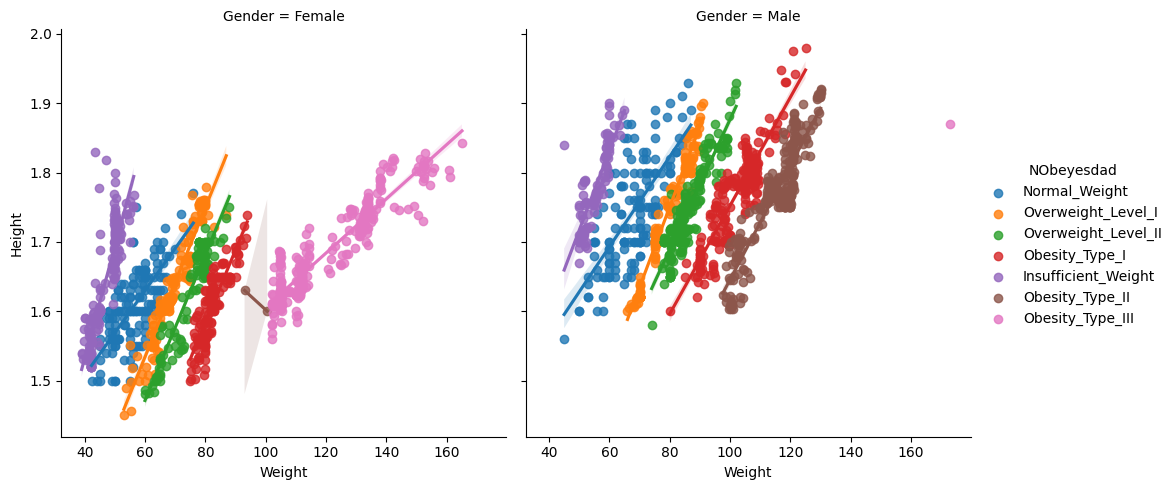

In [ ]:
#Picture 4
#Draw a scatter plot . Divided into 2 parts according to gender ,weight was compared with height .
sns.lmplot(x="Weight",y="Height",data=obesity,col="Gender",hue="NObeyesdad")
plt.show()

#**Results and discussion :**
According to the pictures above,

Family_history_with_overweight and Weight(Picture 1) : For individuals with no family history of obesity, the number of insufficient weight , normal weight and obeesity type I was the highest. For individuals with a family history of obesity  , Obesity_Type_I, Obesity_Type_II ,Obesity_Type_III and Overweight_Level_I had the highest numbers. This suggests that a family history of obesity has some influence on obesity .

Height and Weight(Picture 2) : Most of the people in the sample were Obesity_Type_II, with obesity being the highest .

Height and Weight(Picture 3) : A phenomenon that exists in both male and female is that weight increases with height . Except for one male who weighs 173 ,females dominate the weight range greater than 130 .

Height and Weight(Picture 4) : Obesity_Type_III , the majority of the points go to females , with one point referring to a single male.  Obesity_Type_II , the majority of the points go to male, with two points going to females .

#**Conclusion :**
Based on the visual analysis of the data, it is evident that obesity is a complex multifactorial issue, involving various aspects such as genetics, physiology , diet , and lifestyle . Subsequently , by selecting the variables most closely correlated with weight—namely , "family_obesity_history ," "Height ," and "Gender"—for correlation analysis, the following conclusions can be drawn .

The variable most strongly correlated with weight is a family history of obesity . Individuals with a family history of obesity are more prone to being overweight. Weight tends to increase with height , suggesting a positive correlation between these two variables. Females are more likely than males to suffer from Obesity_Type_III (BMI >= 40 kg/m^2) , indicating a higher predisposition to severe obesity in females. On the other hand, males exhibit a higher likelihood of developing Obesity_Type_II (BMI 35~40 kg/m^2) compared to females .

The conclusions drawn from this analysis provide valuable insights for further exploration into the causes of obesity . The identified factors , especially the influence of family obesity history , height , and gender , can guide subsequent investigations into understanding the complex interplay of genetic , physiological , and lifestyle factors contributing to obesity .